In [0]:
#!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [0]:
ls -lh /content/gdrive/My\ Drive/nlp-data

total 56M
-rw------- 1 root root 565K Dec 17 21:46 labeled.tsv
-rw------- 1 root root  56M Dec 17 21:47 unlabeled.tsv


In [0]:
from fastai.text import *
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

In [0]:
def join_text(row):
    title, abstract = row.title, row.abstract
    return title + '\n' + abstract

In [0]:
df = pd.read_csv('/content/gdrive/My Drive/nlp-data/unlabeled.tsv', sep='\t')
df['text'] = df.apply(join_text, axis=1)
df['label'] = 0.5
df = df[['label', 'text']]

df = df.sample(n=5000)

In [0]:
df_trn, df_val = train_test_split(df, test_size=0.2)

df_trn.shape, df_val.shape

((4000, 2), (1000, 2))

In [0]:
# Language model data
data_lm = TextLMDataBunch.from_df(train_df=df_trn, valid_df=df_val, path="")

In [0]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.58E-02
Min loss divided by 10: 1.74E-02
CPU times: user 7.38 s, sys: 4.2 s, total: 11.6 s
Wall time: 12.1 s


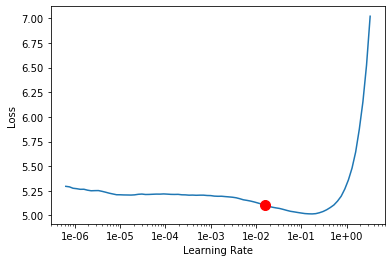

In [0]:
%%time
learn.lr_find()
learn.recorder.plot(suggestion=True)
min_grad_lr = learn.recorder.min_grad_lr

In [0]:
%time learn.fit_one_cycle(10, min_grad_lr)

epoch,train_loss,valid_loss,accuracy,time
0,4.496871,4.071990,0.315994,00:24
1,4.025987,3.898067,0.327123,00:24
2,3.815299,3.921669,0.324959,00:24
3,3.556483,3.949450,0.324285,00:24
4,3.349475,3.956839,0.326604,00:24
5,3.152918,3.966647,0.326658,00:24
6,2.952300,3.976100,0.327897,00:24
7,2.768976,3.978006,0.329218,00:24
8,2.649961,3.982597,0.329177,00:24
9,2.583018,3.982966,0.329350,00:24


CPU times: user 2min 33s, sys: 1min 26s, total: 3min 59s
Wall time: 4min 4s


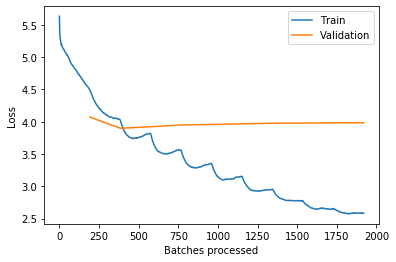

In [0]:
learn.recorder.plot_losses()

In [0]:
%%time
learn.unfreeze()
learn.fit_one_cycle(2, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,2.618095,3.990371,0.330375,00:30
1,2.379148,4.042095,0.330248,00:30


CPU times: user 37.6 s, sys: 21.4 s, total: 59 s
Wall time: 1min


epoch,train_loss,valid_loss,accuracy,time
0,4.307992,3.964130,0.321829,00:24
1,3.686057,3.827065,0.333036,00:24


epoch,train_loss,valid_loss,accuracy,time
0,3.396841,3.752278,0.341577,00:29
1,3.118726,3.740944,0.343914,00:29


CPU times: user 1min 8s, sys: 39.1 s, total: 1min 47s
Wall time: 1min 48s


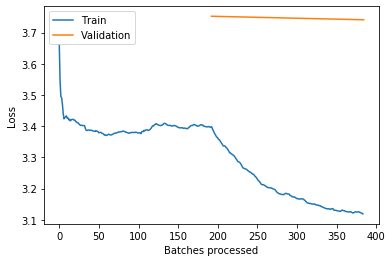

In [0]:
%%time
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)
learn.fit_one_cycle(2, min_grad_lr)
learn.unfreeze()
learn.fit_one_cycle(2, 1e-3)
learn.recorder.plot_losses()

In [0]:
%time learn.fit_one_cycle(1, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,3.064736,3.744049,0.343181,00:29


CPU times: user 18.5 s, sys: 10.8 s, total: 29.3 s
Wall time: 29.9 s


In [0]:
learn.predict("We used a deep neural network to", n_words=10)

'We used a deep neural network to represent the sketching system for generic nodule detection . xxbos'

In [0]:
learn.save_encoder('ft_enc_5000')

In [0]:
data_lm.save('data_lm_export.pkl')

In [0]:
data_lm

TextLMDataBunch;

Train: LabelList (4000 items)
x: LMTextList
xxbos xxmaj learning and xxmaj interpreting xxmaj multi - xxmaj multi - xxmaj instance xxmaj learning xxmaj networks 
  xxmaj we introduce an extension of the multi - instance learning problem where examples are organized as nested bags of instances ( e.g. , a document could be represented as a bag of sentences , which in turn are bags of words ) . xxmaj this framework can be useful in various scenarios , such as text and image classification , but also supervised learning over graphs . xxmaj as a further advantage , multi - multi instance learning enables a particular way of interpreting predictions and the decision function . xxmaj our approach is based on a special neural network layer , called bag - layer , whose units aggregate bags of inputs of arbitrary size . xxmaj we prove theoretically that the associated class of functions contains all xxmaj boolean functions over sets of sets of instances and we provide empirical